In [30]:
import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.metrics import auc, f1_score, roc_curve
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

from prettytable import PrettyTable  # To print in tabular format

from sklearn.metrics import r2_score

from sklearn.impute import SimpleImputer


In [6]:
arquivo = pd.read_csv("./UNSW_NB15_testing-set.csv",low_memory=False)


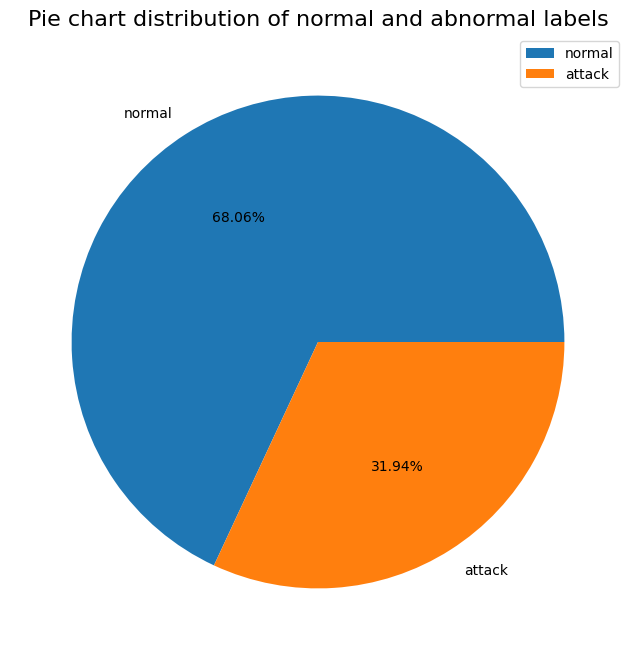

In [7]:
plt.figure(figsize=(8,8))
plt.pie(arquivo.label.value_counts(),labels=['normal','attack'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('./binario/Pie_chart.png')
plt.show()

In [8]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(arquivo,col):
  for i in col:
    arr = arquivo[i]
    arr = np.array(arr)
    arquivo[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return arquivo

In [9]:
# selecting numeric attributes columns from data
num_col = list(arquivo.select_dtypes(include='number').columns)
num_col.remove('label')
print(num_col)


['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [10]:



# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(arquivo.label.map(lambda x:'normal' if x==0 else 'attack'))

# creating a dataframe with binary labels (normal,abnormal)
bin_data = arquivo.copy()
bin_data['label'] = bin_label

# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

np.save("le1_classes.npy",le1.classes_,allow_pickle=True)





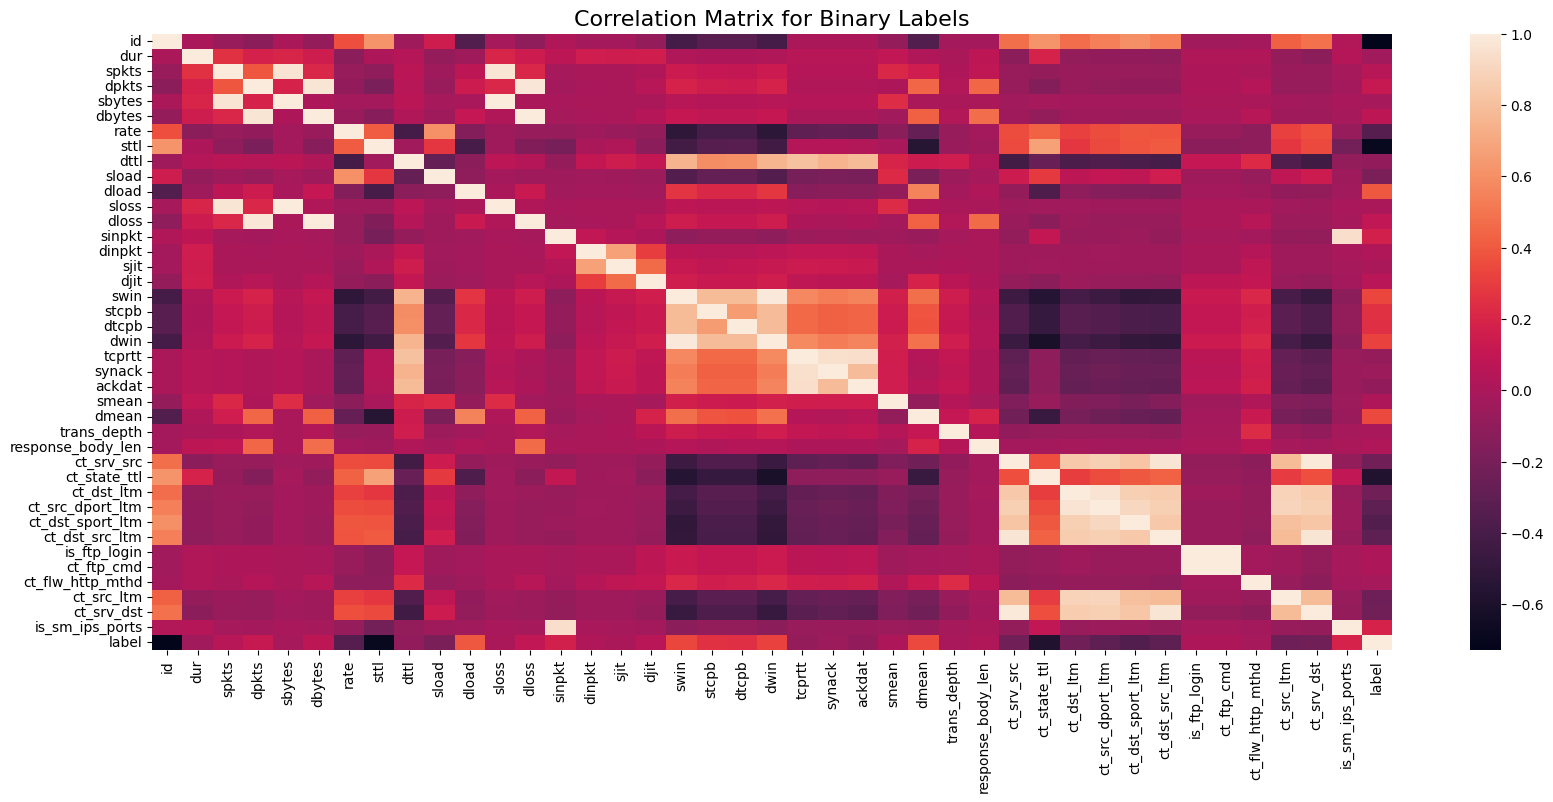

In [11]:
num_col.append('label')


# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.savefig('./binario/correlation_matrix_bin.png')
plt.show()

### feature selection

In [12]:

# finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)





ct_dst_src_ltm      0.303855
ct_src_dport_ltm    0.305579
dwin                0.319626
swin                0.333633
rate                0.337979
dmean               0.341806
ct_dst_sport_ltm    0.357213
dload               0.393739
ct_state_ttl        0.577704
sttl                0.692741
id                  0.727173
label               1.000000
Name: label, dtype: float64

In [13]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols


Index(['id', 'rate', 'sttl', 'dload', 'swin', 'dwin', 'dmean', 'ct_state_ttl',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label'],
      dtype='object')

In [14]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data

bin_data.to_csv('./binario/bin_data.csv')

### CLASSIFICAÇÃO BINARIA

In [15]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

x_treino,x_teste,y_treino,y_teste = train_test_split(X,Y,test_size=0.25, random_state=80)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# cria um modelo de árvore de decisão
modelo = DecisionTreeClassifier()

# treina o modelo
modelo.fit(x_treino, y_treino)

# faz previsões no conjunto de teste
y_previsao_DT = modelo.predict(x_teste)

# calcula as métricas de avaliação
acuracia = accuracy_score(y_teste, y_previsao_DT)
precisao = precision_score(y_teste, y_previsao_DT, average='weighted')
revocacao = recall_score(y_teste, y_previsao_DT, average='weighted')
f1 = f1_score(y_teste, y_previsao_DT, average='weighted')
matriz_confusao = confusion_matrix(y_teste, y_previsao_DT)
relatorio_classificacao = classification_report(y_teste, y_previsao_DT)

# exibe as métricas de avaliação
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Recall:", revocacao)
print("F1-Score:", f1)
print("Matriz de Confusão:")
print(matriz_confusao)
print("Relatório de Classificação:")
print(relatorio_classificacao)

Acurácia: 0.9919472579614929
Precisão: 0.9919561097273266
Recall: 0.9919472579614929
F1-Score: 0.9919505861753906
Matriz de Confusão:
[[29745   198]
 [  155 13738]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29943
           1       0.99      0.99      0.99     13893

    accuracy                           0.99     43836
   macro avg       0.99      0.99      0.99     43836
weighted avg       0.99      0.99      0.99     43836



C:\Users\thelo\AppData\Local\Temp\ipykernel_7812\4153628771.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(y_teste[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')


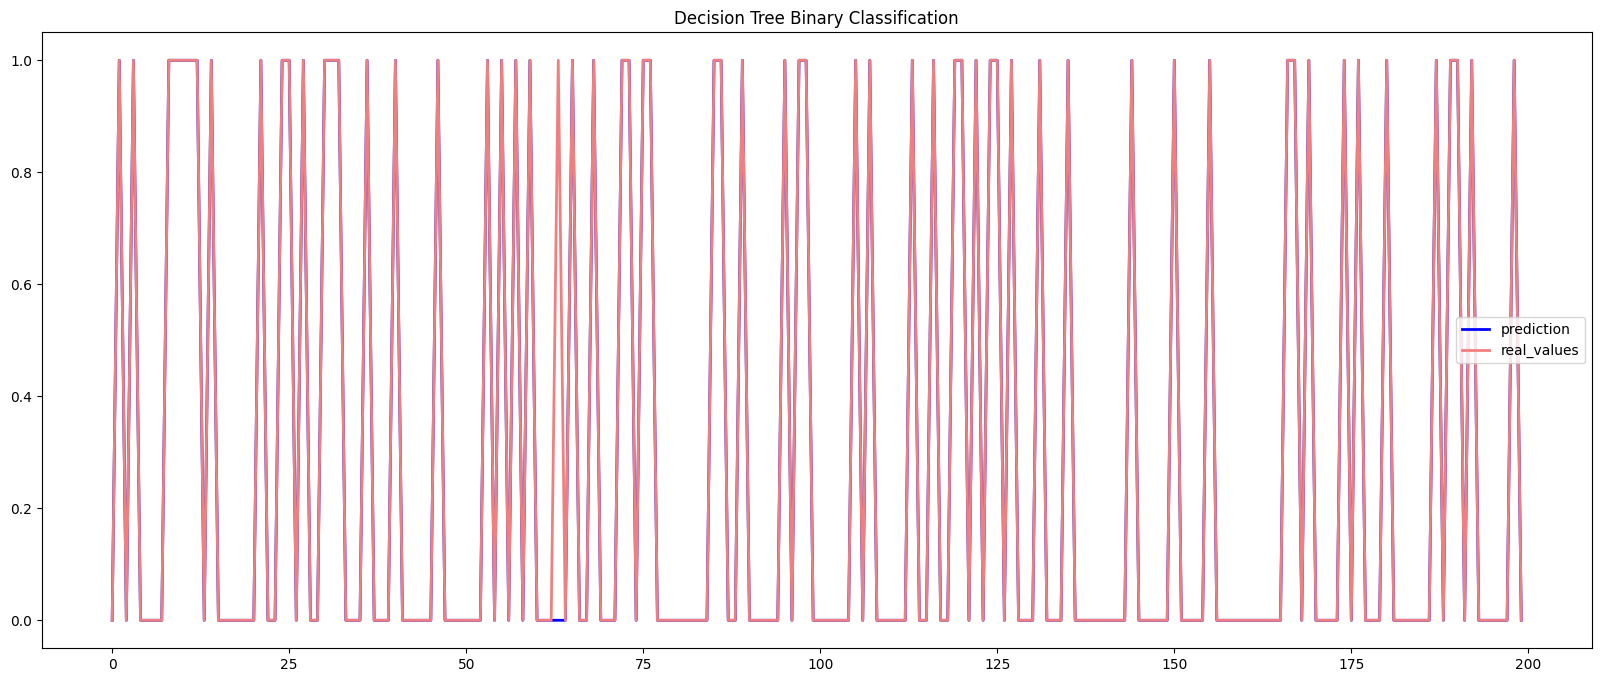

In [17]:

plt.figure(figsize=(20,8))
plt.plot(y_previsao_DT[300:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_teste[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Decision Tree Binary Classification")
plt.savefig('./binario/dt_real_pred_bin.png')
plt.show()

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# cria um modelo de rede neural
modelo = MLPClassifier(random_state=123, solver='adam', max_iter=8000)

# treina o modelo
modelo.fit(x_treino, y_treino)

# faz previsões no conjunto de teste
y_previsao_RN = modelo.predict(x_teste)

# calcula as métricas de avaliação
acuracia = accuracy_score(y_teste, y_previsao_RN)
precisao = precision_score(y_teste, y_previsao_RN, average='weighted')
revocacao = recall_score(y_teste, y_previsao_RN, average='weighted')
f1 = f1_score(y_teste, y_previsao_RN, average='weighted')
matriz_confusao = confusion_matrix(y_teste, y_previsao_RN)
relatorio_classificacao = classification_report(y_teste, y_previsao_RN)

# exibe as métricas de avaliação
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("F1-Score:", f1)
print(relatorio_classificacao)

Acurácia: 0.9529610365909298
Precisão: 0.953655280978608
Revocação: 0.9529610365909298
F1-Score: 0.9523074625193856
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     29943
           1       0.97      0.88      0.92     13893

    accuracy                           0.95     43836
   macro avg       0.96      0.93      0.94     43836
weighted avg       0.95      0.95      0.95     43836



C:\Users\thelo\AppData\Local\Temp\ipykernel_7812\285998521.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(y_teste[100:200].values, label="real_values", linewidth=2.0,color='yellow')


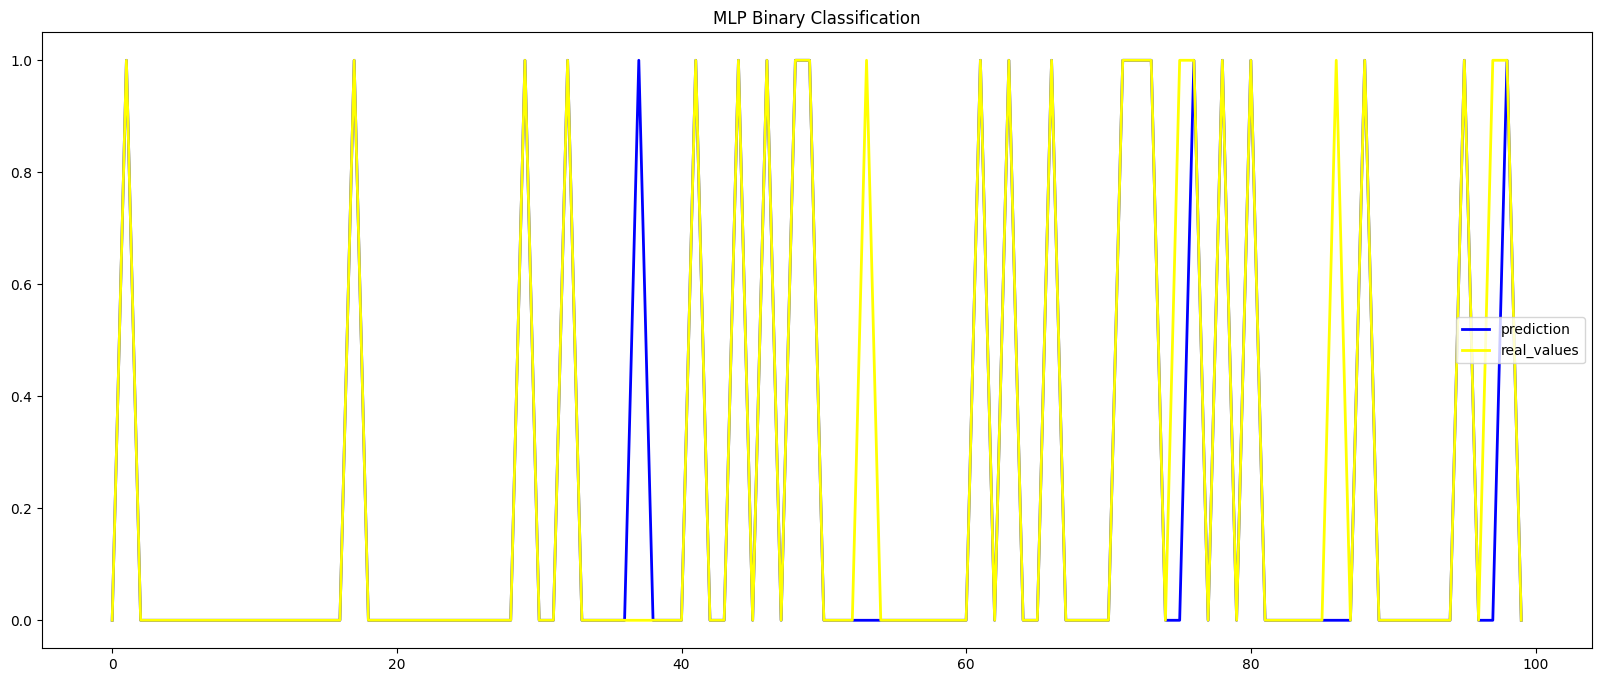

In [19]:
plt.figure(figsize=(20,8))
plt.plot(y_previsao_RN[100:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_teste[100:200].values, label="real_values", linewidth=2.0,color='yellow')
plt.legend(loc="best")
plt.title("MLP Binary Classification")
plt.savefig('./binario/mlp_real_pred_bin.png')
plt.show()

In [20]:
def false_alarm_rate(y_true, y_pred):
    """
    This function will return False Alarm Rate for given true and predicted values.
    False Alarm Rate is average of False Negetive Rate and False Positive Rate
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    FPR = fp / (fp + tn)  # False positive rate
    FNR = fn / (fn + tp)  # False negetive rate
    return (FPR+FNR)/2  # False alarm rate

In [21]:
def hyperparam_tuning(clf, parameters, x, y, method='gridsearch', cv=None):
    """
    Utility function for Tuning hyperparameters
    """
    # initialization
    scoring = {'auc':'roc_auc',
               'f1':'f1',
               'FAR':make_scorer(false_alarm_rate, greater_is_better=False)}  # using custom scoring function FAR.
                
    # param tuning
    if method=='gridsearch':
        # As we are using multi scoring, So we need to point refit to scoring function with which we want to evaluate score
        tuning_clf = GridSearchCV(clf, parameters, scoring=scoring, refit='auc',
                                  cv=cv, verbose=3, return_train_score=True)
        result = tuning_clf.fit(x, y)
    
    elif method=='randomsearch':
        tuning_clf = RandomizedSearchCV(clf, parameters, scoring=scoring, refit='auc',
                                        cv=cv, verbose=3, return_train_score=True)
        result = tuning_clf.fit(x, y)

    return result

In [23]:
def result_visualization(tuned_clf, parameters, param1=None, param2=None):
    """
    Utility function to plot the results obtained after hyper parameter tuning 
    """
    # getting train and test scores to plot
    train_score = tuned_clf.cv_results_['mean_train_auc']
    test_score = tuned_clf.cv_results_['mean_test_auc']

    # print results
    print("Best Score: {}".format(tuned_clf.best_score_))
    print("Best Parameters: {}".format(tuned_clf.best_params_))

    # Want to visualize score with 2 params, plot heatmap of the 3 variables
    if param2 is not None:
        # heatmap
        train_cmap=sns.light_palette("green")
        test_cmap=sns.light_palette("blue")
        
        # Figure and axis
        fig = plt.figure(figsize=(20,5))
        train_ax = fig.add_subplot(1,2,1)
        test_ax = fig.add_subplot(1,2,2)
        
        # train heatmap
        sns.heatmap(train_score.reshape(len(parameters[param1]), len(parameters[param2])),
                    cmap=train_cmap, annot=True, fmt='.4f', ax=train_ax,
                    xticklabels=parameters[param2], yticklabels=parameters[param1])
        
        # test heapmap
        sns.heatmap(test_score.reshape(len(parameters[param1]), len(parameters[param2])),
                    cmap=test_cmap, annot=True, fmt='.6f', ax=test_ax,
                    xticklabels=parameters[param2], yticklabels=parameters[param1])
        
        # axis labels and plot title
        train_ax.set_title("Train hyperparam heatmap")
        train_ax.set_xlabel(param2)
        train_ax.set_ylabel(param1)

        test_ax.set_title("Test hyperparam heatmap")
        test_ax.set_xlabel(param2)
        test_ax.set_ylabel(param1)
        plt.show()
    
    # Want to visualize score with one param, simply plot score and param
    else:
        plt.figure(figsize=(10,5))
        plt.plot(np.log10(parameters[param1]), train_score, label="train")
        plt.plot(np.log10(parameters[param1]), test_score, label="test")

        # Plot for train data
        for i, txt in enumerate(train_score):
            plt.annotate((parameters[param1][i], np.round(txt, 3)), (np.log10(parameters[param1])[i], train_score[i]))
        
        # Plot for test data
        for i, txt in enumerate(test_score):
            plt.annotate((parameters[param1][i], np.round(txt, 3)), (np.log10(parameters[param1])[i], test_score[i]))
        
        plt.xlabel(param1)
        plt.ylabel('performance')
        plt.grid()
        plt.legend()
        plt.show()

In [24]:
def evaluate_result(clf, x_train, y_train, x_test, y_test, model_name):
    """ 
    Utility function to get result on test data from best found classifier using hyper parameter tuning.
    Print the accuracy and False Alarm Rate for both train and test.
    Plot confusion matrix of train and test.
    """
    cmap=sns.light_palette("blue")
    labels= ['non-attack', 'attack']
    
    # Training te best model
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)  # prediction on train data
    y_test_pred = clf.predict(x_test)  # prediction on test data
    
    # auc curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    # Scores of train dataset
    train_auc = auc(train_fpr, train_tpr)
    train_f1 = f1_score(y_train, y_train_pred)
    train_far = false_alarm_rate(y_train, y_train_pred)
    
    # Scores of test dataset
    test_auc = auc(test_fpr, test_tpr)
    test_f1 = f1_score(y_test, y_test_pred)
    test_far = false_alarm_rate(y_test, y_test_pred)
    
    # Printing the result as a table
    x = PrettyTable()
    x.field_names = ['Dataset', 'Model', 'AUC', 'F1-score', 'False Alarm Rate']
    x.add_row(['Train', model_name, train_auc, train_f1, train_far])
    x.add_row(['Test', model_name, test_auc, test_f1, test_far])
    print(x)

    # Plot AUC curve
    plt.figure()
    plt.plot(train_fpr, train_tpr, label=f"Train AUC: {train_auc}")
    plt.plot(test_fpr, test_tpr, label=f"Test AUC: {test_auc}")
    plt.grid()
    plt.legend()
    plt.show()

    # Confusion martix of train and test
    # Train confusion matrix
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix(y_train, y_train_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Train Confusion Matrix")

    # Test confusion matrix
    plt.subplot(1,2,2)
    sns.heatmap(confusion_matrix(y_test, y_test_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Test Confusion Matrix")
    plt.show()
    
    # Returning scores of test data
    return clf, test_auc, test_f1, test_far

In [22]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
# DT classifier
clf = DecisionTreeClassifier()
param = {'max_depth':[8, 10, 12, 14],
         'min_samples_split':[2, 4, 6]}

dt_clf = hyperparam_tuning(clf, param, x_treino, y_treino, cv=3)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END max_depth=8, min_samples_split=2; FAR: (train=-0.042, test=-0.042) auc: (train=0.996, test=0.995) f1: (train=0.956, test=0.955) total time=   0.1s
[CV 2/3] END max_depth=8, min_samples_split=2; FAR: (train=-0.042, test=-0.042) auc: (train=0.995, test=0.995) f1: (train=0.956, test=0.955) total time=   0.1s
[CV 3/3] END max_depth=8, min_samples_split=2; FAR: (train=-0.042, test=-0.042) auc: (train=0.996, test=0.995) f1: (train=0.956, test=0.956) total time=   0.1s
[CV 1/3] END max_depth=8, min_samples_split=4; FAR: (train=-0.042, test=-0.042) auc: (train=0.996, test=0.995) f1: (train=0.956, test=0.956) total time=   0.1s
[CV 2/3] END max_depth=8, min_samples_split=4; FAR: (train=-0.042, test=-0.042) auc: (train=0.995, test=0.995) f1: (train=0.956, test=0.955) total time=   0.1s
[CV 3/3] END max_depth=8, min_samples_split=4; FAR: (train=-0.042, test=-0.042) auc: (train=0.996, test=0.995) f1: (train=0.956, test=0.956

Best Score: 0.9972338909143984
Best Parameters: {'max_depth': 12, 'min_samples_split': 6}


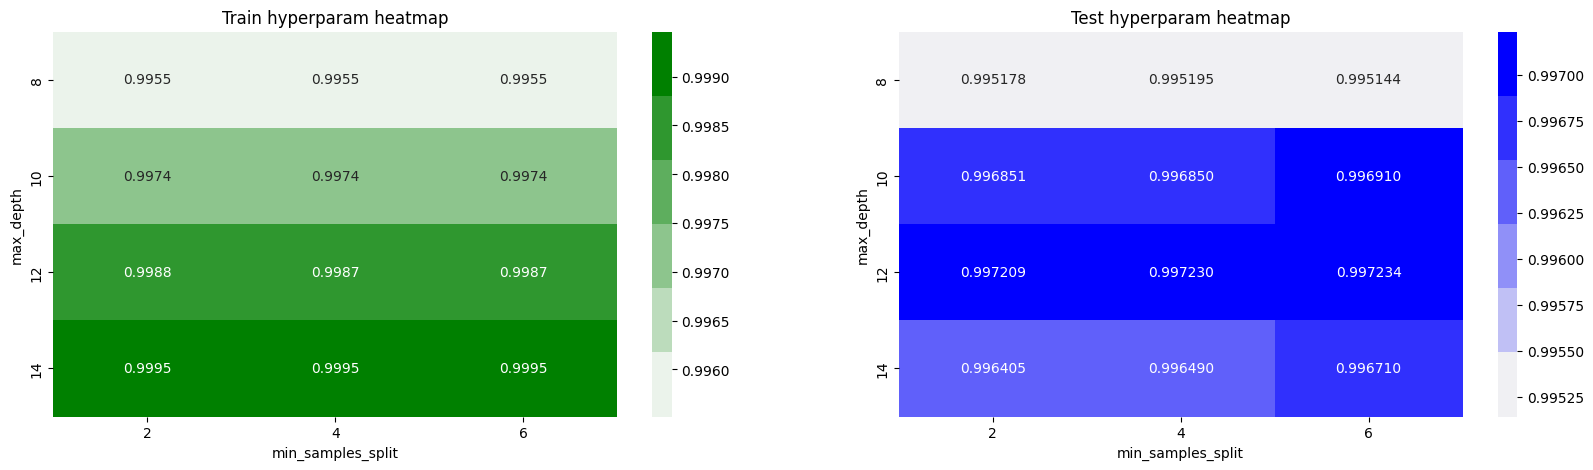

In [25]:
# Plotting heatmap of scores with params
result_visualization(dt_clf, param, 'max_depth', 'min_samples_split')

In [27]:
# Tuning "min_samples_leaf" on top of best found params
clf = dt_clf.best_estimator_
param = {'min_samples_leaf':[9, 11, 13]}

dt_clf = hyperparam_tuning(clf, param, x_treino, y_treino,cv=3)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END min_samples_leaf=9; FAR: (train=-0.022, test=-0.023) auc: (train=0.999, test=0.998) f1: (train=0.970, test=0.968) total time=   0.3s
[CV 2/3] END min_samples_leaf=9; FAR: (train=-0.019, test=-0.021) auc: (train=0.999, test=0.998) f1: (train=0.974, test=0.971) total time=   0.4s
[CV 3/3] END min_samples_leaf=9; FAR: (train=-0.022, test=-0.025) auc: (train=0.999, test=0.997) f1: (train=0.971, test=0.967) total time=   0.3s
[CV 1/3] END min_samples_leaf=11; FAR: (train=-0.022, test=-0.023) auc: (train=0.999, test=0.998) f1: (train=0.970, test=0.968) total time=   0.3s
[CV 2/3] END min_samples_leaf=11; FAR: (train=-0.019, test=-0.020) auc: (train=0.999, test=0.998) f1: (train=0.974, test=0.972) total time=   0.3s
[CV 3/3] END min_samples_leaf=11; FAR: (train=-0.022, test=-0.025) auc: (train=0.999, test=0.997) f1: (train=0.970, test=0.967) total time=   0.3s
[CV 1/3] END min_samples_leaf=13; FAR: (train=-0.022, test=-0.

Best Score: 0.9975591703410712
Best Parameters: {'min_samples_leaf': 11}


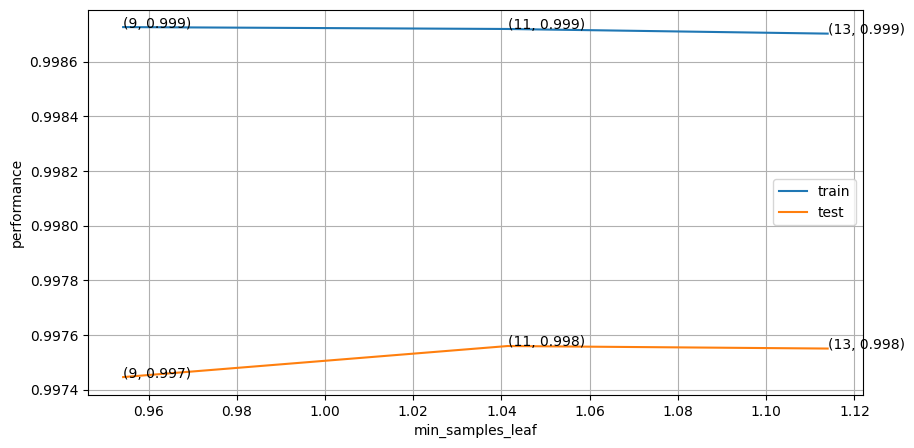

In [28]:
result_visualization(dt_clf, param, 'min_samples_leaf')

+---------+-------+--------------------+--------------------+----------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate   |
+---------+-------+--------------------+--------------------+----------------------+
|  Train  |   DT  | 0.9628859861282439 | 0.9599597387931459 | 0.037114013871756085 |
|   Test  |   DT  | 0.9628599132132092 | 0.9599285634557428 | 0.037140086786790816 |
+---------+-------+--------------------+--------------------+----------------------+


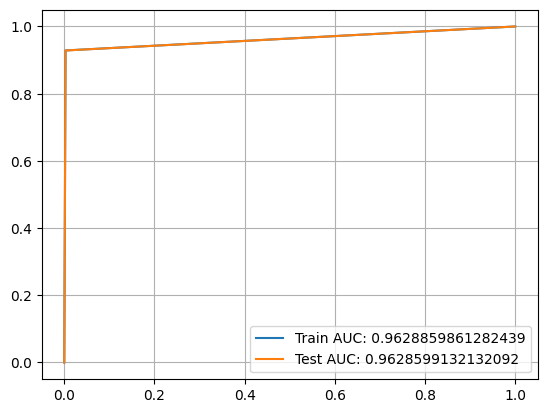

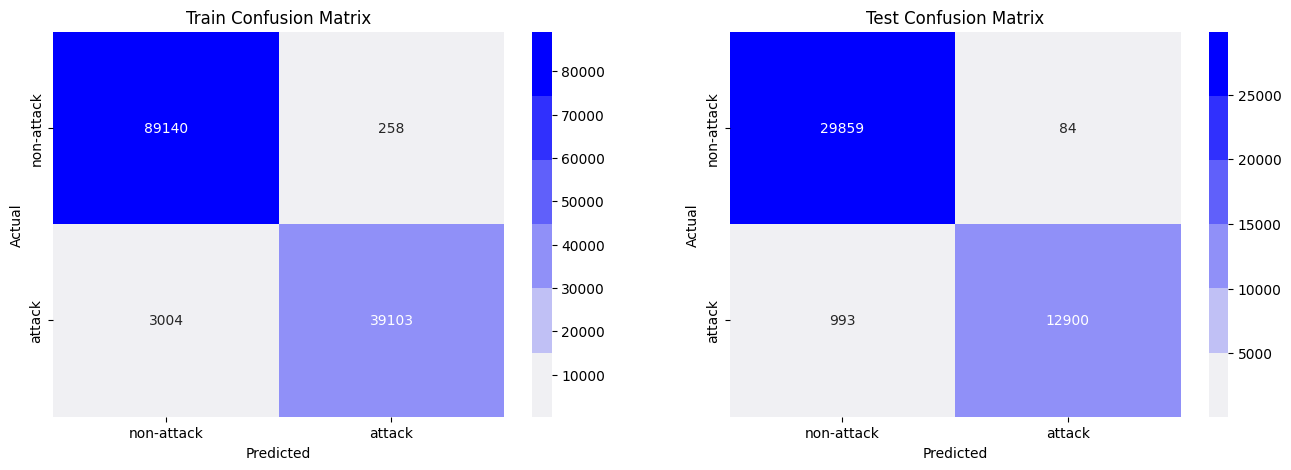

In [31]:
dt_param = {'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf':9}

dt_best_clf = DecisionTreeClassifier(**dt_param)
dt_clf, dt_auc, dt_f1, dt_far = evaluate_result(dt_best_clf, x_treino, y_treino, x_teste, y_teste, 'DT')